# <center> Density Of States
Author: Leandro Salemi ( leandro.salemi@physics.uu.se ) <br>
Date: 30th August 2021

Here is a small notebook to explore quickly the data about the **density of states** (DOS). The density of states is given in units of 

$$ #electrons per unit energy per unit cell -->  eV^{-1} $$


The data files are composed of 4 columns. 

- Column 1 is the energy axis, in eV.
- Column 2 is the DOS for spin up, in eV^-1
- Column 3 is the DOS for spin down, in eV^-1
- Column 4 is the total DOS (spin up + spin down), in eV^-1

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Here I load the data for Pt. For Fe, replate "Pt" by "Fe"
data = np.loadtxt("Pt/DOS.dat")

# data[:, 0] = energy axis, in eV.
# data[:, 1] = DOS for spin up, in eV^-1
# data[:, 2] = DOS for spin down, in eV^-1
# data[:, 3] = Total DOS, in eV^-1

In the next cell I am going to integrate the DOS. The integral of the DOS times the Fermi-Dirac distribution must equal to the number of electrons per unit cell.

$$ N = \int DOS(E) ~ f(E) ~ dE$$

where N is the number of electrons per unit cell, $DOS(E)$ the density of states of $f(E)$ the Fermi-Dirac distribution. You can consider $f(E)$ to be a step function, with 1 below the Fermi energy, and 0 above.

In our calculations, we don't look at the deep core electrons, therefore the integration is going to give the number of valence electrons.

For Platinum, we have 18 valence electrons considered. The cell is FCC (volume = 60.43 $Angstrom^3$) and contains 4 Pt atoms. Therefore the DOS should integrate to $4 \times 18 = 72$.

For Iron, we have 16 valence electrons considered. The cell is BCC (volume = 23.55 $Angstrom^3$) and contains 2 Fe atoms. Therefore the DOS should integrate to $2 \times 16 = 32$.

I checked the integration, it gives good numbers (there is a slight microscopic deviation because of numerical reasons, don't worry about it, you can safely ignore). Note that you could also get the DOS per unit volume. It would give you the number of electrons, per unit energy, per unit volume. For this, divide by the volume of the cell (I gave the volumes earlier). Take care of the units. 
$$ 1 Angstrom = 0.1 nm = 1.89 Bohr $$

In [16]:
def integrate_DOS(E, DOS, expected_integrated_DOS):
    dE = E[1] - E[0]
    integrated = np.cumsum(DOS * dE)
    
    print("Integrated density = %.2f, expected = %.2f" % (integrated[np.argmin(np.abs(E))], expected_integrated_DOS))
    rel_err = np.abs(integrated[np.argmin(np.abs(E))] - expected_integrated_DOS) / expected_integrated_DOS
    print("\t--> Relative error of %.2f percents" % (100 * rel_err))
    print()
    
    return integrated
    
    

print("Integrating for Pt:")
data = np.loadtxt("Pt/DOS.dat")
integrated = integrate_DOS(data[:, 0], data[:, -1], expected_integrated_DOS = 72)    

print("Integrating for Fe:")
data = np.loadtxt("Fe/DOS.dat")
integrated = integrate_DOS(data[:, 0], data[:, -1], expected_integrated_DOS = 32)    

Integrating for Pt:
Integrated density = 72.02, expected = 72.00
	--> Relative error of 0.03 percents

Integrating for Fe:
Integrated density = 32.08, expected = 32.00
	--> Relative error of 0.25 percents



### DOS plots

In the data, the range of energy is quite large. Restrict the view around Fermi, for instance -10 to +10 eV !

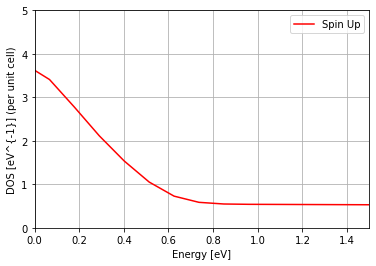

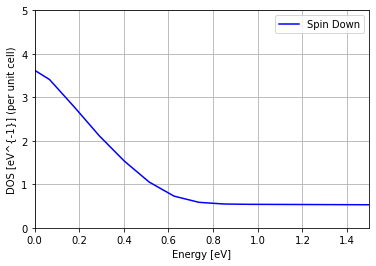

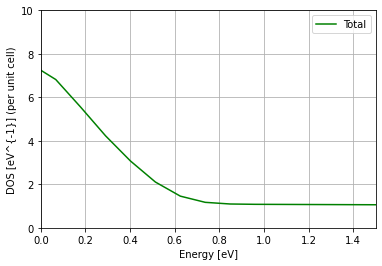

In [17]:
### THIS IS FOR PLATINUM
data = np.loadtxt("Pt/DOS.dat")
plt.figure()
plt.plot(data[:, 0], data[:, 1], "-r", label = "Spin Up")
plt.xlim((0, 1.5))
plt.ylim((0, 5))
plt.xlabel("Energy [eV]")
plt.ylabel("DOS [eV^{-1}] (per unit cell)")
plt.legend()
plt.grid()

plt.figure()
plt.plot(data[:, 0], data[:, 2], "-b", label = "Spin Down")
plt.xlim((0, 1.5))
plt.ylim((0, 5))
plt.xlabel("Energy [eV]")
plt.ylabel("DOS [eV^{-1}] (per unit cell)")
plt.legend()
plt.grid()

plt.figure()
plt.plot(data[:, 0], data[:, 3], "-g", label = "Total")
plt.xlim((0, 1.5))
plt.ylim((0, 10))
plt.xlabel("Energy [eV]")
plt.ylabel("DOS [eV^{-1}] (per unit cell)")
plt.legend()
plt.grid()

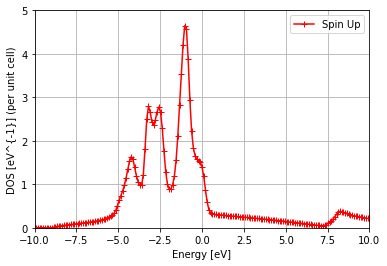

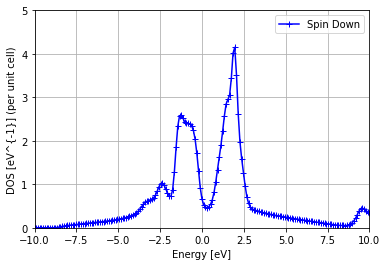

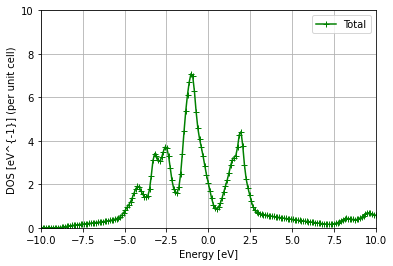

In [27]:
### THIS IS FOR IRON
data = np.loadtxt("Fe/DOS.dat")
plt.figure()
plt.plot(data[:, 0], data[:, 1], "-+r", label = "Spin Up")
plt.xlim((-10,10 ))
plt.ylim((0, 5))
plt.xlabel("Energy [eV]")
plt.ylabel("DOS [eV^{-1}] (per unit cell)")
plt.legend()
plt.grid()

plt.figure()
plt.plot(data[:, 0], data[:, 2], "-+b", label = "Spin Down")
plt.xlim((-10,10 ))
plt.ylim((0, 5))
plt.xlabel("Energy [eV]")
plt.ylabel("DOS [eV^{-1}] (per unit cell)")
plt.legend()
plt.grid()

plt.figure()
plt.plot(data[:, 0], data[:, 3], "-+g", label = "Total")
plt.xlim((-10,10 ))
plt.ylim((0, 10))
plt.xlabel("Energy [eV]")
plt.ylabel("DOS [eV^{-1}] (per unit cell)")
plt.legend()
plt.grid()

In [25]:
data = np.loadtxt("Fe/DOS.dat")
# print(data)
E_0 = data[0,0]
E_end = data[-1,0]
print(E_0, E_end)
# for E in data[1:,0]:
#     if E > -0.5 and E < 2.0:
#         print(E, end = "\t")

-92.990119 10.0
